In [1]:
# Churn means if a client is still using our services or switched to another service provider

In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# importing data
df = pd.read_csv("Customer Churn.csv")

In [4]:
# checking the data type for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# some cliens have total charges as blank in csv as their tenure is 0. We have to change those blanks to 0 
# and change total charges data type to float
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking for duplicates
df["customerID"].duplicated().sum()

0

In [9]:
# in csv senior citizens column, 1 means yes and 0 means no
# we have to convert this to yes and no
def scchange(value):
    if value == 1:
        return "yes"
    else:
        return "no"
        
df["SeniorCitizen"]=df["SeniorCitizen"].apply(scchange)

In [10]:
# check if function has been implemented
df["SeniorCitizen"]

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

# CUSTOMER CHURNED OUT

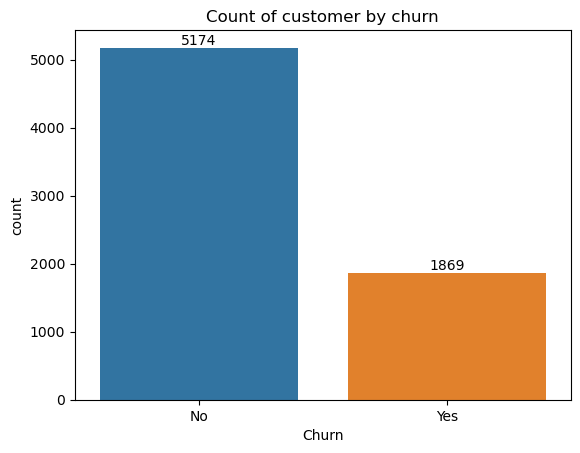

In [12]:
switched = sns.countplot(x = "Churn", data = df)
switched.bar_label(switched.containers[0])
plt.title("Count of customer by churn") # adding title to the chart
plt.show()

In [13]:
group = df.groupby("Churn").agg({"Churn":"count"})
group

,Churn
Churn,
No,5174
Yes,1869


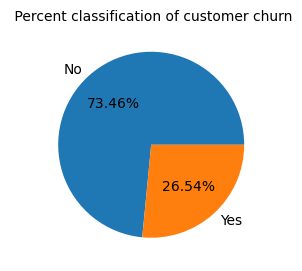

In [15]:
# Putting group values in a pie chart, added labels and aut=o percentage with formatting
plt.figure(figsize= (3,4)) # Changed size of the pie chart
plt.pie(group["Churn"], labels = group.index, autopct = "%1.2f%%")
plt.title(" Percent classification of customer churn", fontsize = 10) # Adding title and chaging font size
plt.show()

### from given pie chart we can conclude about 26% customers left us

# ANALYSIS BASED ON GENDER 

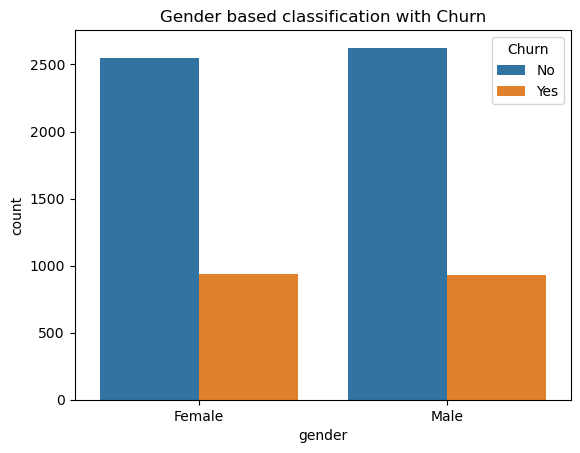

In [17]:
# Segregating number of clients based on gender and filtering further to know how many churned 
sns.countplot(x = "gender" , data = df, hue = "Churn")
plt.title("Gender based classification with Churn")
plt.show()

### From the above chart we can conclude further gender based analysis is not required as churn to gender ratio is equal in males to females. 

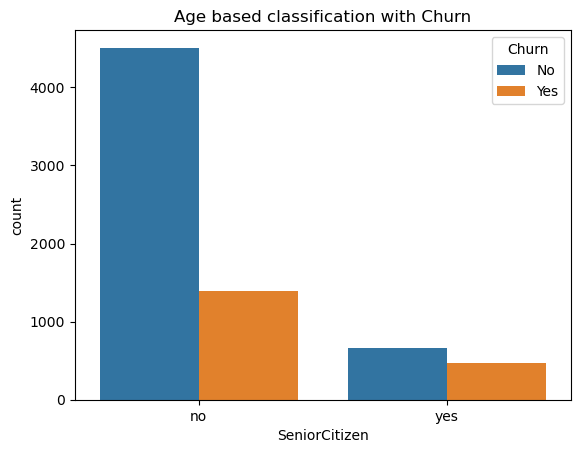

In [19]:
# Segregating number of clients based on age and filtering further to know how many churned 
sns.countplot(x = "SeniorCitizen" , data = df, hue = "Churn")
plt.title("Age based classification with Churn")
plt.show()

### From the above chart we can see our overall client base has comparatively less senior citizen but the churn is much higher in senior citizens. 

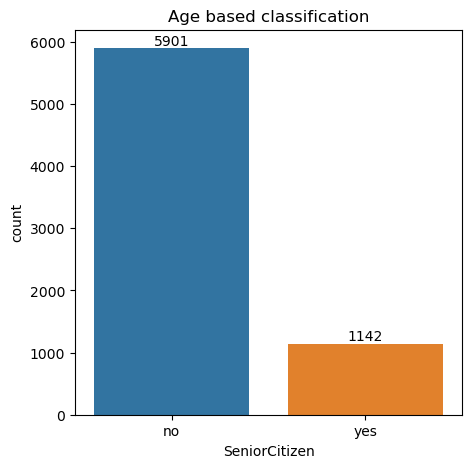

In [21]:
# checking how much % of our data is senior citizen
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0]) # This adds totals to the bar 
plt.title("Age based classification")
plt.show()

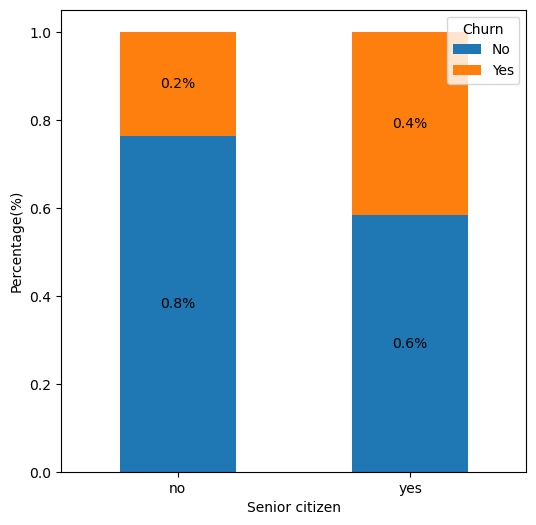

In [22]:
total_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()
fig, ax = plt.subplots(figsize = (6, 6))
total_counts.plot(kind = "bar", stacked=True, ax=ax, color = ['#1f77b4', '#ff7f0e'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center',va='center')
plt.set_title = ("Churn by senior citizen")
plt.xlabel("Senior citizen")
plt.ylabel("Percentage(%)")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")
plt.show()

### From the above chart we can see that about 40% of senior citizens are churning. 

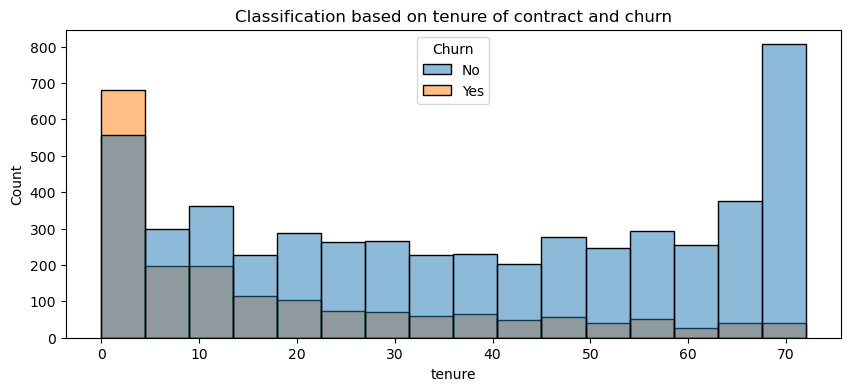

In [24]:
plt.figure(figsize = (10, 4))
sns.histplot(x = "tenure", data = df, hue = "Churn")
plt.title("Classification based on tenure of contract and churn")
plt.show()

### As we can see from the above chart, most of the clients churn is happening with inception stage of the contract / term. Clients who have stayed with us longer than 3 months have not churned. 

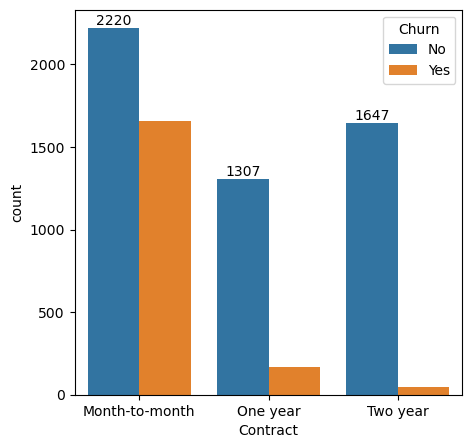

In [25]:
# Count of people based on the tenure of their contracts
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0]) # This adds totals to the bar 
plt.show()

### In support of the graph prior to this one, we can now conclude the churn is happening on the initial stage of the contract with clients who have month-to-month contracts. This also summarizes our focus must be on converting these clients to 1 or 2 year contracts. 

In [26]:
df.columns.values # shows all columns 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

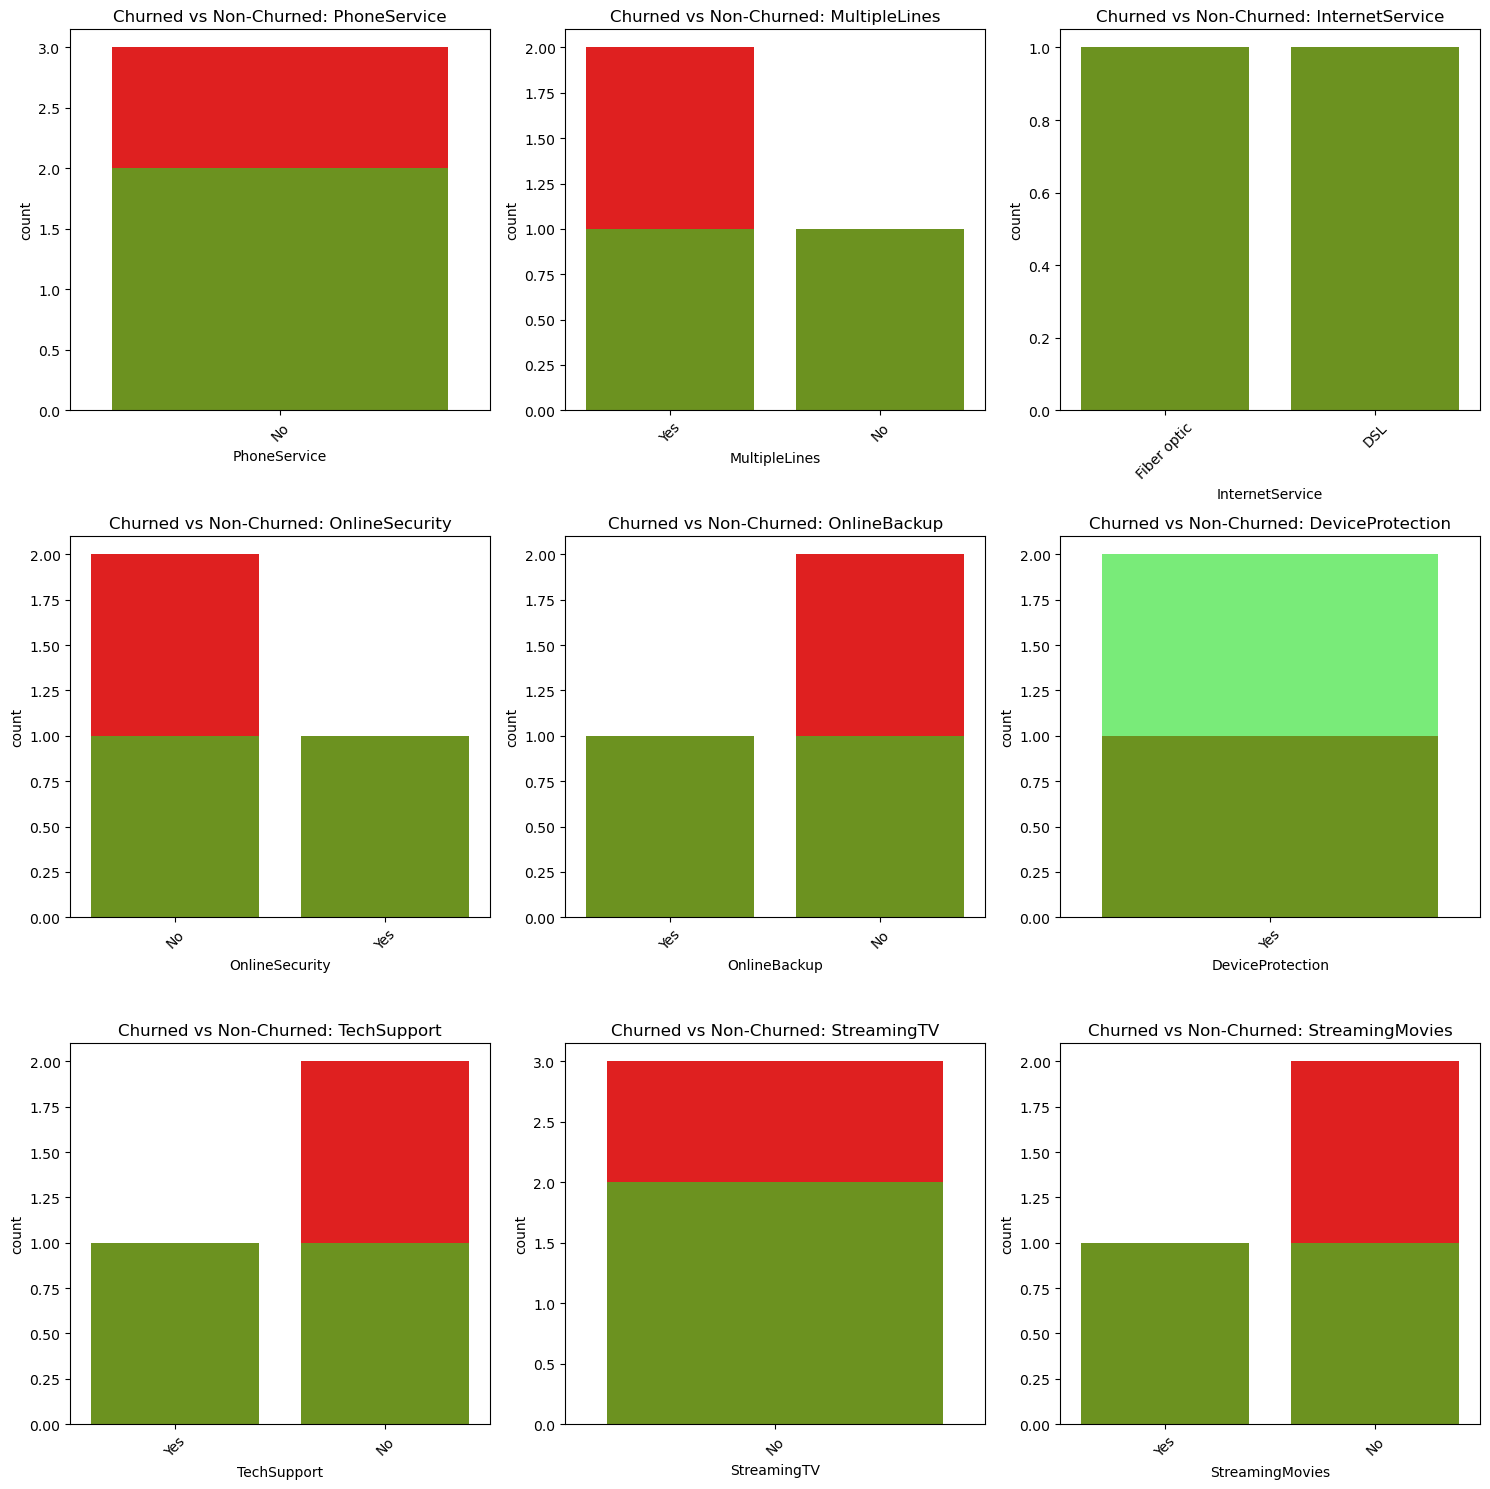

In [27]:
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'Yes', 'No', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'Fiber optic', 'DSL', 'No'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'OnlineBackup': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['Yes', 'Yes', 'No', 'Yes', 'No'],
    'TechSupport': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes']  # Churn column (Yes or No)
}

df1 = pd.DataFrame(data)

# List of columns for countplots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filter data based on churn (Churn == 'Yes' or Churn == 'No')
df1_churned = df1[df1['Churn'] == 'Yes']
df1_non_churned = df1[df1['Churn'] == 'No']

# Create subplots
n_columns = 3  # Number of columns in the grid
n_rows = (len(columns) // n_columns) + (len(columns) % n_columns > 0)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5*n_rows))

# Flatten the axes array for easier indexing if the grid is not a perfect square
axes = axes.flatten()

# Plot countplots for each column, split by Churn status
for i, column in enumerate(columns):
    # Plot for churned clients (red)
    sns.countplot(x=column, data=df1_churned, ax=axes[i], palette=['#FF0000'])  # Red for churned
    axes[i].set_title(f'Churned ({column})')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    # Plot for non-churned clients (green)
    sns.countplot(x=column, data=df1_non_churned, ax=axes[i], palette=['#00FF00'], alpha=0.6)  # Green for non-churned
    axes[i].set_title(f'Churned vs Non-Churned: {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove unused axes if the number of columns is less than the total subplot space
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### In all of the above plots, Churned = Yes is marked in Red whereas Churned = No is marked in Green. This way we can clearly see services which are contributing to the churn.
### 1. Service that stands out is Multiple lines where clients with multiple lines have heavy churn. 
### 2. Majority of customers who do not churn tend to have services such as Phone service, Internet service (DSL), and online security.
### 3. With services like Online backup, Tech-support and TV Streaming, churn rates are higher when these services are not used / unavailable. 

In [28]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


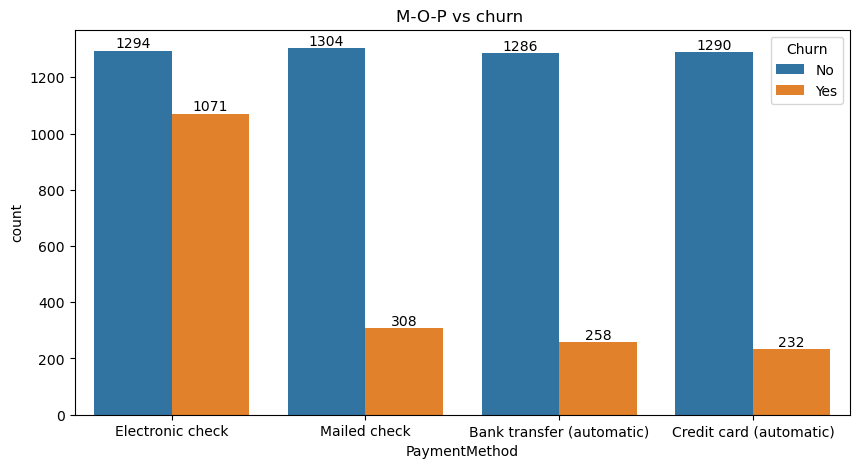

In [29]:
# checking how method of payment affects churn rate
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0]) # This adds totals to the bar 
ax.bar_label(ax.containers[1]) # add totals to the hue bar
ax.set_title("M-O-P vs churn ") # use this command as sometime plt.title("") doesn's work and we need to restart kerner
plt.show()

### the above chart shows the customer is likely to churn when he is using electronic check as m-o-p. 